# Movie Recommendation Systems

Movie Recommendation System is a content-based recommendation system where the user inputs a movie and gets a list of movies related to it.
This project is implemented on the basis of correlation.
The correlation between the entered movie and other movies is calculated and sorted in a list which is output.


Note:
This is not a complete robust movie recommendation systems.
While there are many factors to be considerd in a movie like genres(action,comedy,adventerous,etc), in this project I have used user ratings as a parameter to consider for the recommendation.
The data set used in this project is attached. It is taken from movielens dataset.

Datasets:
1. itemid_movies: Each movie has an item id number related to it.This file contains all the movies with their corresponding item_id

2. userid_ratings: The users have given ratings to the movie. Every user has a user_id. This file has all the user_id along with item_id of the movie they have given ratings to and the timespan of the movies. 


# Importing Libraries

In [1]:
import numpy as np                # for creating multi-dimensional arrays
import pandas as pd               # for reading the datasets
from scipy import stats           # for more mathematical functions

# Let's get the data from Files

In [2]:
head=['user_id','item_id','ratings','timespan']              #giving headings to the file
ratingData= pd.read_csv("userid_ratings.data",names=head,sep='\t')
ratingData.head()

,user_id,item_id,ratings,timespan
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
moviesData=pd.read_csv("itemid_movies.txt")
moviesData.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Merging of Data

In [4]:
mergeData= pd.merge(ratingData,moviesData,on='item_id')
mergeData.head()

,user_id,item_id,ratings,timespan,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# Exploratory Data Analysis(EDA)
Python libraries like matplotlib and seaborn are useful for doing Exploratory Data Analysis in Python.

In [5]:
import matplotlib.pyplot as plt               # for basic plotting
import seaborn as sns                         # for advanced plotting and data visulaization
sns.set_style('white')                        # set the background as white.Other include whitegrid,darkgrid,dark,ticks
%matplotlib inline

Now we need to take a look at ratings of the movie.
So we need to find the mean of the ratings and display them.
We will use our merged dataset mergeData for sorting

In [6]:
mergeData.groupby('title')['ratings'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: ratings, dtype: float64

Since it is not possible for many movies having 5 star ratings, it might be the case that they are rated only by one or two users.So,lets count the ratings of movies

In [7]:
mergeData.groupby('title')['ratings'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: ratings, dtype: int64

Getting the movie and their ratings

In [8]:
ratings=pd.DataFrame(mergeData.groupby('title')['ratings'].mean())
ratings.head()

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Integrating the count of ratings to above dataframe

In [9]:
ratings['number of ratings']= pd.DataFrame(mergeData.groupby('title')['ratings'].count())
ratings.head()

,ratings,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


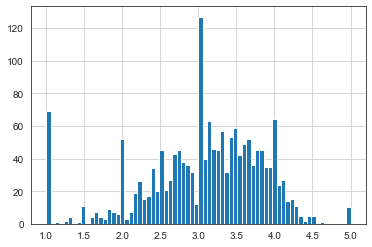

In [10]:
ratings['ratings'].hist(bins=70)                                               #plotting a histogram

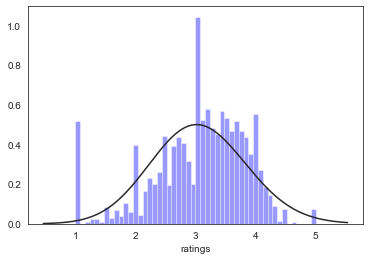

In [11]:
sns.distplot(ratings['ratings'],color='b',kde=False,fit=stats.gamma,bins=50);   #plotting a normal curve on histogram


# Movie Recommendation

Now we need a table which shows the users and their corresponding rating of the movie they have given.
So we are using the pivot table to see this data.Displaying user_id in rows and title in columns and finding the ratings they have given.

In [12]:
movie_matrix=mergeData.pivot_table(index='user_id',columns='title',values='ratings')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


Now, Lets see the highly rated movies in our dataset.

In [13]:
ratings.sort_values('number of ratings',ascending=False).head()

,ratings,number of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


To see the ratings given by different users for starwars movie, we need a list to store all these values.

In [14]:
starwars= movie_matrix['Star Wars (1977)']
starwars.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

Now, we will find correaltion of starwars movie with all the movies and recommed the movie which is highly correlated to it.

In [15]:
similar_to_starwars = movie_matrix.corrwith(starwars)

C:\Users\Aafaz\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Aafaz\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [16]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

Creating a DataFrame containing movies and correlation with the starwars movie. 

In [17]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Sorting the correaltion in descending order of correlation.

In [18]:
corr_starwars.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies that are watched only once or twice by users who also watched star wars.

Also, lets see the number of ratings of the movies

In [19]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])
corr_starwars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


So we will display only the movie which has been rated more than 100 times and display 5 movies which has higher correaltion values.

In [20]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('Correlation',ascending=False).head(5)

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Similarly, this can be done for any movie in the dataset.